In [1]:
# !pip install stim~=1.14
import stim
# !pip install pymatching~=2.0
import pymatching

In [2]:
from stim_baconshor import *

In [3]:
circuit = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(0.9) 0                                     
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]
                       
          
""")

In [5]:
circuit.diagram()

q0: -R-DEPOLARIZE1(0.001)-Y_ERROR(0.9)-@-----------------------------------------------------------------------------------------------H-----------------------------------X--------------------------------------------------------------------------------------------------------------------------------------------------
                                        |                                                                                                                                   |
 q1: -R-DEPOLARIZE1(0.001)--------------|-@---------------------------------------------------------------@-----------------------------H-----------------------------------|--------------X-----------------------------------------------------------------------------------------------------------------------------------
                                        | |                                                               |                                                                 |              |
 q2: -R-DEPOLARIZE1(0.001)--------------|-|---------------------------------------------------------------|-@---------------------------H-----------------------------------|--------------|--------------X--------------------------------------------------------------------------------------------------------------------
                                        | |                                                               | |                                                               |              |              |
 q3: -R-DEPOLARIZE1(0.001)--------------|-|----------@----------------------------------------------------|-|---------------------------H-----------------------------------|-X------------|--------------|-----------------------------------------X--------------------------------------------------------------------------
                                        | |          |                                                    | |                                                               | |            |              |                                         |
 q4: -R-DEPOLARIZE1(0.001)--------------|-|----------|-@--------------------------------------------------|-|----------@----------------H-----------------------------------|-|------------|-X------------|-----------------------------------------|--------------X-----------------------------------------------------------
                                        | |          | |                                                  | |          |                                                    | |            | |            |                                         |              |
 q5: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|--------------------------------------------------|-|----------|-@--------------H-----------------------------------|-|------------|-|------------|-X---------------------------------------|--------------|---------------X-------------------------------------------
                                        | |          | |                                                  | |          | |                                                  | |            | |            | |                                       |              |               |
 q6: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|----------@---------------------------------------|-|----------|-|--------------H-----------------------------------|-|------------|-|------------|-|---------------------------------------|-X------------|---------------|-------------------------------------------
                                        | |          | |          |                                       | |          | |                                                  | |            | |            | |                                       | |            |               |
 q7: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|----------|-@-------------------------------------|-|----------|-|----------@

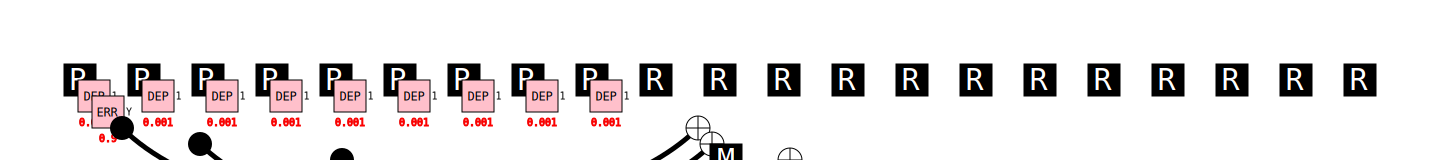

In [6]:
circuit.diagram('timeslice-svg')

In [7]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=5))

[[ True False  True False]
 [ True False  True False]
 [ True False  True False]
 [ True False  True False]
 [ True False  True False]]


In [25]:
circuit = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(0.4) 0                                     
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]
                       
          
""")

In [24]:
sampler = circuit.compile_detector_sampler()
samples = sampler.sample(shots=5)
print(samples)

[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [ True False  True False]]


In [10]:
convert_stab_measurements(samples)

[[-1, 1, -1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [-1, 1, -1, 1], [1, 1, 1, 1]]

In [11]:
test_circuit = construct_circuit(5, 0, [])

In [12]:
print(test_circuit)

R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
R 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64

Y_ERROR(0)

CX 0 25
CX 1 25
M 25

CX 5 26
CX 6 26
M 26

CX 10 27
CX 11 27
M 27

CX 15 28
CX 16 28
M 28

CX 20 29
CX 21 29
M 29

DETECTOR(0) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

CX 1 30
CX 2 30
M 30

CX 6 31
CX 7 31
M 31

CX 11 32
CX 12 32
M 32

CX 16 33
CX 17 33
M 33

CX 21 34
CX 22 34
M 34

DETECTOR(1) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

CX 2 35
CX 3 35
M 35

CX 7 36
CX 8 36
M 36

CX 12 37
CX 13 37
M 37

CX 17 38
CX 18 38
M 38

CX 22 39
CX 23 39
M 39

DETECTOR(2) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

CX 3 40
CX 4 40
M 40

CX 8 41
CX 9 41
M 41

CX 13 42
CX 14 42
M 42

CX 18 43
CX 19 43
M 43

CX 23 44
CX 24 44
M 44

DETECTOR(3) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

H 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
H 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62

In [6]:


circuit = stim.Circuit('''
QUBIT_COORDS(0, 0) 0
QUBIT_COORDS(1, 0) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(0, 1) 3
QUBIT_COORDS(1, 1) 4
QUBIT_COORDS(2, 1) 5
QUBIT_COORDS(0, 2) 6
QUBIT_COORDS(1, 2) 7
QUBIT_COORDS(2, 2) 8

QUBIT_COORDS(0.5, 0) 9
QUBIT_COORDS(0.5, 1) 10
QUBIT_COORDS(0.5, 2) 11
QUBIT_COORDS(1.5, 0) 12
QUBIT_COORDS(1.5, 1) 13
QUBIT_COORDS(1.5, 2) 14

QUBIT_COORDS(0, 0.5) 15
QUBIT_COORDS(1, 0.5) 16
QUBIT_COORDS(2, 0.5) 17
QUBIT_COORDS(0, 1.5) 18
QUBIT_COORDS(1, 1.5) 19
QUBIT_COORDS(2, 1.5) 20


R 0 1 2 3 4 5 6 7 8
R 9 10 11 12 13 14 15 16 17 18 19 20

DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

CX 0 9
CX 1 9
M 9

CX 3 10
CX 4 10
M 10

CX 6 11
CX 7 11
M 11

DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12

CX 4 13
CX 5 13
M 13

CX 7 14
CX 8 14
M 14

DETECTOR(1) rec[-1] rec[-2] rec[-3]

H 0 1 2 3 4 5 6 7 8
H 15 16 17 18 19 20

CX 15 0
CX 15 3
H 15
M 15

CX 16 1
CX 16 4
H 16
M 16

CX 17 2
CX 17 5
H 17
M 17

DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18

CX 19 4
CX 19 7
H 19
M 19

CX 20 5
CX 20 8
H 20
M 20

DETECTOR(3) rec[-1] rec[-2] rec[-3]
''')


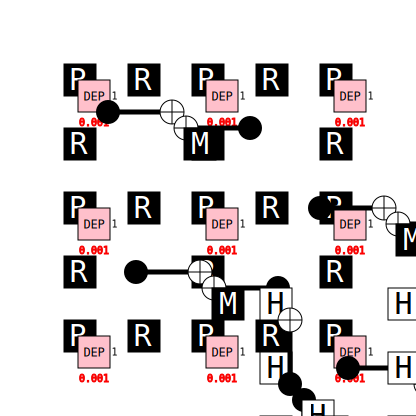

In [11]:
circuit.diagram('timeslice-svg')

In [15]:
svg = circuit.diagram('timeslice-svg')

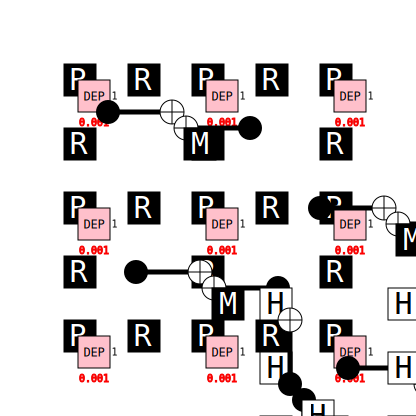

In [16]:
svg

In [7]:
count = count_logical_errors(circuit, 1)

detection events [[False False False False]]
observable flips []
Shot 0: actual=[], predicted=[]


In [5]:
count

0

In [4]:
circuit1 = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(0.9) 0
                                      
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]
                       
          
""")

In [5]:
count = count_logical_errors(circuit1, 1)

detection events [[ True False  True False]]
observable flips []
Shot 0: actual=[], predicted=[]


In [7]:
count

0

In [104]:
circuit2 = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20 21 22
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(1.0) 0
Y_ERROR(1.0) 5
Y_ERROR(1.0) 7

                                      
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                        
CX 0 21
CX 3 21
CX 6 21
M 21
OBSERVABLE_INCLUDE(0) rec[-1]
                        
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 22
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]

CX 22 0
CX 22 1
CX 22 2
H 22
M 22
OBSERVABLE_INCLUDE(1) rec[-1]
                       
          
""")

In [105]:
count = count_logical_errors(circuit2, 1)

detection events [[False False False False]]
observable flips [[ True  True]]
Shot 0: actual=[ True  True], predicted=[1 1]


In [103]:
count
print(f"Number of logical errors: {count}")

Number of logical errors: 0


## with qubit coords

In [3]:
circtuit3 = construct_circuit(3, 0, [])

In [4]:
circuit31 = add_qubit_coords(circtuit3,3)

In [5]:
circuit32 = stim.Circuit(circuit31)

In [6]:
circuit32

stim.Circuit('''
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(0, 1) 1
    QUBIT_COORDS(0, 2) 2
    QUBIT_COORDS(1, 0) 3
    QUBIT_COORDS(1, 1) 4
    QUBIT_COORDS(1, 2) 5
    QUBIT_COORDS(2, 0) 6
    QUBIT_COORDS(2, 1) 7
    QUBIT_COORDS(2, 2) 8
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    Y_ERROR(0)
    CX 0 9 1 9
    M 9
    CX 3 10 4 10
    M 10
    CX 6 11 7 11
    M 11
    DETECTOR(0) rec[-1] rec[-2] rec[-3]
    CX 1 12 2 12
    M 12
    CX 4 13 5 13
    M 13
    CX 7 14 8 14
    M 14
    DETECTOR(1) rec[-1] rec[-2] rec[-3]
    H 0 1 2 3 4 5 6 7 8 15 16 17 18 19 20
    CX 15 0 15 3
    H 15
    M 15
    CX 16 1 16 4
    H 16
    M 16
    CX 17 2 17 5
    H 17
    M 17
    DETECTOR(2) rec[-1] rec[-2] rec[-3]
    CX 18 3 18 6
    H 18
    M 18
    CX 19 4 19 7
    H 19
    M 19
    CX 20 5 20 8
    H 20
    M 20
    DETECTOR(3) rec[-1] rec[-2] rec[-3]
''')

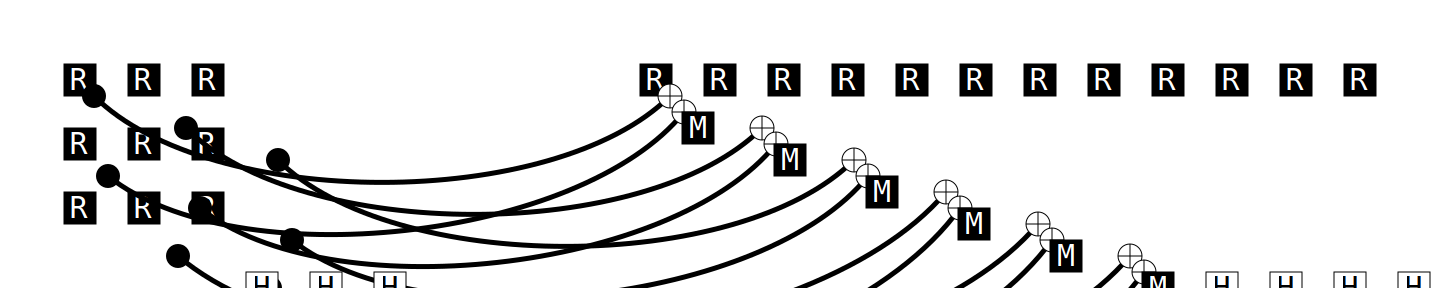

In [7]:
circuit32.diagram('timeslice-svg')

In [4]:
circtuit4 = construct_circuit(3, 0, [])

In [5]:
circuit41 = add_qubit_coords(circtuit4,3)
circuit42 = stim.Circuit(circuit41)

In [6]:
circuit42

stim.Circuit('''
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(0, 1) 1
    QUBIT_COORDS(0, 2) 2
    QUBIT_COORDS(1, 0) 3
    QUBIT_COORDS(1, 1) 4
    QUBIT_COORDS(1, 2) 5
    QUBIT_COORDS(2, 0) 6
    QUBIT_COORDS(2, 1) 7
    QUBIT_COORDS(2, 2) 8
    QUBIT_COORDS(0, 0.5) 9
    QUBIT_COORDS(1, 0.5) 10
    QUBIT_COORDS(2, 0.5) 11
    QUBIT_COORDS(0, 1.5) 12
    QUBIT_COORDS(1, 1.5) 13
    QUBIT_COORDS(2, 1.5) 14
    QUBIT_COORDS(0.5, 0) 15
    QUBIT_COORDS(0.5, 1) 16
    QUBIT_COORDS(0.5, 2) 17
    QUBIT_COORDS(1.5, 0) 18
    QUBIT_COORDS(1.5, 1) 19
    QUBIT_COORDS(1.5, 2) 20
    QUBIT_COORDS(0, 0) 0
    QUBIT_COORDS(0, 1) 1
    QUBIT_COORDS(0, 2) 2
    QUBIT_COORDS(1, 0) 3
    QUBIT_COORDS(1, 1) 4
    QUBIT_COORDS(1, 2) 5
    QUBIT_COORDS(2, 0) 6
    QUBIT_COORDS(2, 1) 7
    QUBIT_COORDS(2, 2) 8
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    Y_ERROR(0)
    CX 0 9 1 9
    M 9
    CX 3 10 4 10
    M 10
    CX 6 11 7 11
    M 11
    DETECTOR(0) rec[-1] rec[-2] rec[-3]
    CX 1 

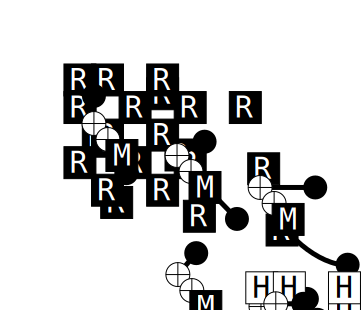

In [8]:
circuit42.diagram('timeslice-svg')

## after fixing gauges measurement basis

In [3]:
circuit5 = construct_circuit(3, 0, [1])
circuit51 = stim.Circuit(circuit5)

In [6]:
circuit51

stim.Circuit('''
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    Y_ERROR(0) 1
    CX 0 9 3 9
    M 9
    CX 1 10 4 10
    M 10
    CX 2 11 5 11
    M 11
    DETECTOR(0) rec[-1] rec[-2] rec[-3]
    CX 3 12 6 12
    M 12
    CX 4 13 7 13
    M 13
    CX 5 14 8 14
    M 14
    DETECTOR(1) rec[-1] rec[-2] rec[-3]
    H 15
    CX 15 0 15 1
    H 15
    M 15
    H 16
    CX 16 3 16 4
    H 16
    M 16
    H 17
    CX 17 6 17 7
    H 17
    M 17
    DETECTOR(2) rec[-1] rec[-2] rec[-3]
    H 18
    CX 18 1 18 2
    H 18
    M 18
    H 19
    CX 19 4 19 5
    H 19
    M 19
    H 20
    CX 20 7 20 8
    H 20
    M 20
    DETECTOR(3) rec[-1] rec[-2] rec[-3]
''')

In [4]:
count = count_logical_errors(circuit51, 1)

detection events [[False False False False]]
observable flips []


ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D3', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D3 > output_image.svg

This was discovered while analyzing a Z-basis reset (R) on:
    qubit 8

The collapse anti-commuted with these detectors/observables:
    D3 [coords (3)]

The backward-propagating error sensitivity for D3 was:
    X1
    X2
    X4
    X5
    X7
    X8

Circuit stack trace:
    at instruction #1 [which is R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]

In [ ]:
count
print(f"Number of logical errors: {count}")

In [42]:
circuit2 = stim.Circuit('''
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    Y_ERROR(0.9) 0
    CX 0 9 
    CX 3 9
    M 9
    CX 1 10
    CX 4 10
    M 10
    CX 2 11 
    CX 5 11
    M 11
    DETECTOR(0) rec[-1] rec[-2] rec[-3]
    CX 3 12 
    CX 6 12
    M 12
    CX 4 13 
    CX 7 13
    M 13
    CX 5 14 
    CX 8 14
    M 14
    DETECTOR(1) rec[-1] rec[-2] rec[-3]
            
    TICK
    SHIFT_COORDS(0, 0, 1)
    R 15 16 17
    H 15
    CX 15 0
    CX 15 1
    H 15
    M 15
    H 16
    CX 16 3 
    CX 16 4
    H 16
    M 16
    H 17
    CX 17 6 
    CX 17 7
    H 17
    M 17
    DETECTOR(2) rec[-1] rec[-2] rec[-3]
    H 18
    CX 18 1 
    CX 18 2
    H 18
    M 18
    H 19
    CX 19 4 
    CX 19 5
    H 19
    M 19
    H 20
    CX 20 7 
    CX 20 8
    H 20
    M 20
    DETECTOR(3) rec[-1] rec[-2] rec[-3]
''')


In [43]:
count = count_logical_errors(circuit2, 1)

detection events [[ True False  True False]]
observable flips []


ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D3', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D3 > output_image.svg

This was discovered while analyzing a Z-basis reset (R) on:
    qubit 8

The collapse anti-commuted with these detectors/observables:
    D3 [coords (3)]

The backward-propagating error sensitivity for D3 was:
    X1
    X2
    X4
    X5
    X7
    X8

Circuit stack trace:
    during TICK layer #1 of 2
    at instruction #1 [which is R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]

In [3]:
circuit = construct_circuit_corrected(3,1.0)

TypeError: append(): incompatible function arguments. The following argument types are supported:
    1. (self: stim._stim_polyfill.Circuit, name: object, targets: object = (), arg: object = None, *, tag: str = '') -> None

Invoked with: stim.Circuit('''
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
'''), 'X_ERROR', [1]; kwargs: p=1.0

In [44]:
circuit2 = stim.Circuit('''
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
    X_ERROR(0.9) 0
    CZ 0 9 
    CZ 3 9
    M 9
    CZ 1 10
    CZ 4 10
    M 10
    CZ 2 11 
    CZ 5 11
    M 11
    DETECTOR(0) rec[-1] rec[-2] rec[-3]
    CZ 3 12 
    CZ 6 12
    M 12
    CZ 4 13 
    CZ 7 13
    M 13
    CZ 5 14 
    CZ 8 14
    M 14
    DETECTOR(1) rec[-1] rec[-2] rec[-3]
''')


In [49]:
count = count_logical_errors(circuit2, 1)

detection events [[False False]]
observable flips []
Shot 0: actual=[], predicted=[]


In [54]:
circuit_complete = stim.Circuit('''
    # Initialize all qubits.
    R 0 1 2 3 4 5 6 7 8
    R 9 10 11 12 13 14 15 16 17 18 19 20
    
    # Add an error for testing.
    Y_ERROR(0.9999999999) 0
    
    # Z-stabilizer measurements (ancillas 9-14)
    # The standard way to measure Z-stabilizers is with a CZ gate
    # as it doesn't rotate bases and avoids conflicts with X-type measurements later.
    
    # Z_0 Z_3 stabilizer measurement
    CX 0 9
    CX 3 9
    M 9
    
    # Z_1 Z_4 stabilizer measurement
    CX 1 10
    CX 4 10
    M 10
    
    # Z_2 Z_5 stabilizer measurement
    CX 2 11
    CX 5 11
    M 11
    DETECTOR(0) rec[-1] rec[-2] rec[-3]
    
    # Z_3 Z_6 stabilizer measurement
    CX 3 12
    CX 6 12
    M 12
    
    # Z_4 Z_7 stabilizer measurement
    CX 4 13
    CX 7 13
    M 13
    
    # Z_5 Z_8 stabilizer measurement
    CX 5 14
    CX 8 14
    M 14
    DETECTOR(1) rec[-1] rec[-2] rec[-3]
    
    # Resetting the ancillas that were just used
    R 9 10 11 12 13 14
    
    # X-stabilizer measurements (ancillas 15-20)
    
    # X_0 X_1 stabilizer measurement
    H 15
    CX 15 0
    CX 15 1
    H 15
    M 15
    
    # X_3 X_4 stabilizer measurement
    H 16
    CX 16 3
    CX 16 4
    H 16
    M 16
    
    # X_6 X_7 stabilizer measurement
    H 17
    CX 17 6
    CX 17 7
    H 17
    M 17
    DETECTOR(2) rec[-1] rec[-2] rec[-3]
    
    # X_1 X_2 stabilizer measurement
    H 18
    CX 18 1
    CX 18 2
    H 18
    M 18
    
    # X_4 X_5 stabilizer measurement
    H 19
    CX 19 4
    CX 19 5
    H 19
    M 19
    
    # X_7 X_8 stabilizer measurement
    H 20
    CX 20 7
    CX 20 8
    H 20
    M 20
    DETECTOR(3) rec[-1] rec[-2] rec[-3]
''')


In [55]:
count = count_logical_errors(circuit_complete, 1)

detection events [[ True False False  True]]
observable flips []


ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D3', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D3 > output_image.svg

This was discovered while analyzing a Z-basis reset (R) on:
    qubit 8

The collapse anti-commuted with these detectors/observables:
    D3 [coords (3)]

The backward-propagating error sensitivity for D3 was:
    X1
    X2
    X4
    X5
    X7
    X8

Circuit stack trace:
    at instruction #1 [which is R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]

In [56]:
def hi(a,b):
    return [a,b]

hi(2,3)

[2, 3]